<a href="https://colab.research.google.com/github/Bibimbap2000/Bibimbap2000/blob/main/Prototype_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
import lxml
from lxml import html
import requests
import numpy as np
import pandas as pd
##Company Abbreviation
symbol = 'TSLA'
url = 'https://finance.yahoo.com/quote/' + symbol + '/balance-sheet?p=' + symbol
 
# Setting up the request headers
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Pragma': 'no-cache',
    'Referrer': 'https://google.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'}
 
##Requesting the info, using the request headers
page = requests.get(url, headers)
##Extracting data
tree = html.fromstring(page.content)

In [ ]:
table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")
##Failsafe
assert len(table_rows) > 0

parsed_rows = []
##Condensed Table
for table_row in table_rows:
    parsed_row = []
    nep = table_row.xpath("./div")   
    none_count = 0
    
    for rs in nep:
        try:
            (text,)=rs.xpath('.//span/text()[1]')
            parsed_row.append(text)
        except ValueError:
            parsed_row.append(np.NaN)
            none_count += 1
    if (none_count<4):
        parsed_rows.append(parsed_row)
df=pd.DataFrame(parsed_rows)
df

,0,1,2,3,4
0,Breakdown,12/31/2019,12/31/2018,12/31/2017,12/31/2016
1,Total Assets,"34,309,000","29,739,614","28,655,372","22,664,076"
2,Total Liabilities Net Minority Interest,"26,842,000","23,981,974","23,420,784","17,125,990"
3,Total Equity Gross Minority Interest,"7,467,000","5,757,640","5,234,588","5,538,086"
4,Total Capitalization,"18,252,000","14,326,915","13,655,631","10,731,195"
5,Common Stock Equity,"6,618,000","4,923,243","4,237,242","4,752,911"
6,Capital Lease Obligations,"1,050,000","1,855,900","1,801,010","1,459,684"
7,Net Tangible Assets,"6,081,000","4,572,592","3,815,503","4,376,766"
8,Working Capital,"1,436,000","-1,685,828","-1,104,150","432,791"
9,Invested Capital,"20,037,000","16,894,614","14,552,180","11,881,342"


In [ ]:
##Cleaning up table data
df=pd.DataFrame(parsed_rows)
df=df.set_index(0)
##Header Account Names
df=df.transpose()
##Renaming the "Breakdown" column to "Date"
cols = list(df.columns)
cols[0] = 'Date'
df = df.set_axis(cols, axis='columns', inplace=False)
df

,Date,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,Common Stock Equity,Capital Lease Obligations,Net Tangible Assets,Working Capital,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordinary Shares Number
1,12/31/2019,"34,309,000","26,842,000","7,467,000","18,252,000","6,618,000","1,050,000","6,081,000","1,436,000","20,037,000","6,081,000","14,469,000","7,151,000","905,310","905,310"
2,12/31/2018,"29,739,614","23,981,974","5,757,640","14,326,915","4,923,243","1,855,900","4,572,592","-1,685,828","16,894,614","4,572,592","13,827,271","8,285,753","863,013","863,013"
3,12/31/2017,"28,655,372","23,420,784","5,234,588","13,655,631","4,237,242","1,801,010","3,815,503","-1,104,150","14,552,180","3,815,503","12,115,948","6,947,024","843,985","843,985"
4,12/31/2016,"22,664,076","17,125,990","5,538,086","10,731,195","4,752,911","1,459,684","4,376,766","432,791","11,881,342","4,376,766","8,588,115","3,735,215","807,805","807,805"


In [ ]:
df.dtypes

Date                                       object
Total Assets                               object
Total Liabilities Net Minority Interest    object
Total Equity Gross Minority Interest       object
Total Capitalization                       object
Common Stock Equity                        object
Capital Lease Obligations                  object
Net Tangible Assets                        object
Working Capital                            object
Invested Capital                           object
Tangible Book Value                        object
Total Debt                                 object
Net Debt                                   object
Share Issued                               object
Ordinary Shares Number                     object
dtype: object

In [ ]:
##Ignoring the Date column
numeric_columns = list(df.columns)[1::]

##Removing seperators and turning the objects into float64
for column_name in numeric_columns:
    df[column_name]=df[column_name].str.replace(',', '')
    df[column_name]=df[column_name].astype(np.float64) # Convert the column to float64

df.dtypes

Date                                        object
Total Assets                               float64
Total Liabilities Net Minority Interest    float64
Total Equity Gross Minority Interest       float64
Total Capitalization                       float64
Common Stock Equity                        float64
Capital Lease Obligations                  float64
Net Tangible Assets                        float64
Working Capital                            float64
Invested Capital                           float64
Tangible Book Value                        float64
Total Debt                                 float64
Net Debt                                   float64
Share Issued                               float64
Ordinary Shares Number                     float64
dtype: object

In [ ]:
df

,Date,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,Common Stock Equity,Capital Lease Obligations,Net Tangible Assets,Working Capital,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordinary Shares Number
1,12/31/2019,34309000.0,26842000.0,7467000.0,18252000.0,6618000.0,1050000.0,6081000.0,1436000.0,20037000.0,6081000.0,14469000.0,7151000.0,905310.0,905310.0
2,12/31/2018,29739614.0,23981974.0,5757640.0,14326915.0,4923243.0,1855900.0,4572592.0,-1685828.0,16894614.0,4572592.0,13827271.0,8285753.0,863013.0,863013.0
3,12/31/2017,28655372.0,23420784.0,5234588.0,13655631.0,4237242.0,1801010.0,3815503.0,-1104150.0,14552180.0,3815503.0,12115948.0,6947024.0,843985.0,843985.0
4,12/31/2016,22664076.0,17125990.0,5538086.0,10731195.0,4752911.0,1459684.0,4376766.0,432791.0,11881342.0,4376766.0,8588115.0,3735215.0,807805.0,807805.0


<b>Income Statement</b>

In [ ]:
##Same as before
from datetime import datetime
import lxml
from lxml import html
import requests
import numpy as np
import pandas as pd

def get_page(url):
# Setting up the request headers
    headers = {
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'en-US,en;q=0.9',
        'Cache-Control': 'max-age=0',
        'Pragma': 'no-cache',
        'Referrer': 'https://google.com',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'}
    return requests.get(url, headers=headers)

def parse_rows(table_rows):
    parsed_rows = []
##Condensed Table    
    for table_row in table_rows:
        parsed_row = []
        nep = table_row.xpath("./div")
        none_count = 0

        for rs in nep:
            try:
                (text,) = rs.xpath('.//span/text()[1]')
                parsed_row.append(text)
            except ValueError:
                parsed_row.append(np.NaN)
                none_count += 1

        if (none_count < 4):
            parsed_rows.append(parsed_row)            
    return pd.DataFrame(parsed_rows)
##Cleaning up table data
def clean_data(df):
    df = df.set_index(0) 
    df = df.transpose()
##Renaming the "Breakdown" column to "Date"
    cols = list(df.columns)
    cols[0] = 'Date'
    df = df.set_axis(cols, axis='columns', inplace=False)
##Ignoring the Date column    
    numeric_columns = list(df.columns)[1::]

    for column_index in range(1, len(df.columns)):      
##Removing seperators and turning the objects into float64
        df.iloc[:,column_index] = df.iloc[:,column_index].str.replace(',', '') 
        df.iloc[:,column_index] = df.iloc[:,column_index].astype(np.float64) 
        
    return df

def scrape_table(url):
##Requesting the info, using the request headers
    page = get_page(url);

##Extracting data
    tree = html.fromstring(page.content)
    table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")
    
##Failsafe
    assert len(table_rows) > 0    
    df = parse_rows(table_rows)
    df = clean_data(df)        
    return df

In [ ]:
##Other Tables
symbol = 'TSLA'
df_balance_sheet = scrape_table('https://finance.yahoo.com/quote/'+ symbol + '/balance-sheet?p='+ symbol)

In [ ]:
scrape_table('https://finance.yahoo.com/quote/' + symbol + '/financials?p=' + symbol)

,Date,Total Revenue,Cost of Revenue,Gross Profit,Operating Expense,Operating Income,Net Non Operating Interest Income Expense,Other Income Expense,Pretax Income,Tax Provision,Net Income Common Stockholders,Diluted NI Available to Com Stockholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,Total Operating Income as Reported,Total Expenses,Net Income from Continuing & Discontinued Operation,Normalized Income,Interest Income,Interest Expense,Net Interest Income,EBIT,Reconciled Cost of Revenue,Reconciled Depreciation,Net Income from Continuing Operation Net Minority Interest,Total Unusual Items Excluding Goodwill,Total Unusual Items,Normalized EBITDA,Tax Rate for Calcs,Tax Effect of Unusual Items
1,ttm,28176000.0,22221000.0,5955000.0,4189000.0,1766000.0,-638000.0,-179000.0,949000.0,251000.0,556000.0,556000.0,NaN,NaN,NaN,NaN,1778000.0,26410000.0,556000.0,547174.0,34000.0,672000.0,-638000.0,1621000.0,22221000.0,2281000.0,556000.0,12000.0,12000.0,3890000.0,0.0,3174.0
2,12/31/2019,24578000.0,20509000.0,4069000.0,3989000.0,80000.0,-641000.0,-104000.0,-665000.0,110000.0,-862000.0,-862000.0,0.0000,0.0000,885000.0,885000.0,-69000.0,24498000.0,-862000.0,-738330.0,44000.0,685000.0,-641000.0,20000.0,20509000.0,2154000.0,-862000.0,-149000.0,-149000.0,2323000.0,0.0,-25330.0
3,12/31/2018,21461268.0,17419247.0,4042021.0,4294861.0,-252840.0,-638538.0,-113367.0,-1004745.0,57837.0,-976091.0,-976091.0,-0.0011,-0.0011,852625.0,852625.0,-388073.0,21714108.0,-976091.0,-877371.0,24533.0,663071.0,-638538.0,-341674.0,17419247.0,1901050.0,-976091.0,-135233.0,-135233.0,1694609.0,0.0,-36513.0
4,12/31/2017,11758751.0,9536264.0,2222487.0,3854573.0,-1632086.0,-451573.0,-125373.0,-2209032.0,31546.0,-1961400.0,-1961400.0,-0.0024,-0.0024,828790.0,828790.0,-1632086.0,13390837.0,-1961400.0,-1961400.0,19686.0,471259.0,-451573.0,-1737773.0,9536264.0,1636003.0,-1961400.0,NaN,NaN,-101770.0,0.0,0.0
5,12/31/2016,7000132.0,5400875.0,1599257.0,2266597.0,-667340.0,-190280.0,111272.0,-746348.0,26698.0,-674914.0,-674914.0,0.0000,0.0000,721060.0,721060.0,-667340.0,7667472.0,-674914.0,-674914.0,8530.0,198810.0,-190280.0,-547538.0,5400875.0,947099.0,-674914.0,NaN,NaN,399561.0,0.0,0.0


In [ ]:
scrape_table('https://finance.yahoo.com/quote/' + symbol + '/balance-sheet?p=' + symbol)

,Date,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,Common Stock Equity,Capital Lease Obligations,Net Tangible Assets,Working Capital,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordinary Shares Number
1,12/31/2019,34309000.0,26842000.0,7467000.0,18252000.0,6618000.0,1050000.0,6081000.0,1436000.0,20037000.0,6081000.0,14469000.0,7151000.0,905310.0,905310.0
2,12/31/2018,29739614.0,23981974.0,5757640.0,14326915.0,4923243.0,1855900.0,4572592.0,-1685828.0,16894614.0,4572592.0,13827271.0,8285753.0,863013.0,863013.0
3,12/31/2017,28655372.0,23420784.0,5234588.0,13655631.0,4237242.0,1801010.0,3815503.0,-1104150.0,14552180.0,3815503.0,12115948.0,6947024.0,843985.0,843985.0
4,12/31/2016,22664076.0,17125990.0,5538086.0,10731195.0,4752911.0,1459684.0,4376766.0,432791.0,11881342.0,4376766.0,8588115.0,3735215.0,807805.0,807805.0


In [ ]:
scrape_table('https://finance.yahoo.com/quote/' + symbol + '/cash-flow?p=' + symbol)

,Date,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,End Cash Position,Income Tax Paid Supplemental Data,Interest Paid Supplemental Data,Capital Expenditure,Issuance of Capital Stock,Issuance of Debt,Repayment of Debt,Free Cash Flow
1,ttm,4349000.0,-2488000.0,7202000.0,14889000.0,NaN,NaN,-2522000.0,7282000.0,11376000.0,-11754000.0,1827000.0
2,12/31/2019,2405000.0,-1436000.0,1529000.0,6783000.0,54000.0,455000.0,-1437000.0,848000.0,10669000.0,-9871000.0,968000.0
3,12/31/2018,2097802.0,-2337428.0,573755.0,4276388.0,35409.0,380836.0,-2319516.0,0.0,6176173.0,-6087029.0,-221714.0
4,12/31/2017,-60654.0,-4418967.0,4414864.0,3367914.0,65695.0,182571.0,-4081354.0,400175.0,7649376.0,-4263788.0,-4142008.0
5,12/31/2016,-123829.0,-1416430.0,3743976.0,3393216.0,16385.0,38693.0,-1440471.0,1701734.0,3622673.0,-1904483.0,-1564300.0


<b>CASH FLOWS</b>

In [ ]:
scrape_table('https://finance.yahoo.com/quote/' + symbol + '/cash-flow?p=' + symbol)

,Date,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,End Cash Position,Income Tax Paid Supplemental Data,Interest Paid Supplemental Data,Capital Expenditure,Issuance of Capital Stock,Issuance of Debt,Repayment of Debt,Free Cash Flow
1,ttm,4349000.0,-2488000.0,7202000.0,14889000.0,NaN,NaN,-2522000.0,7282000.0,11376000.0,-11754000.0,1827000.0
2,12/31/2019,2405000.0,-1436000.0,1529000.0,6783000.0,54000.0,455000.0,-1437000.0,848000.0,10669000.0,-9871000.0,968000.0
3,12/31/2018,2097802.0,-2337428.0,573755.0,4276388.0,35409.0,380836.0,-2319516.0,0.0,6176173.0,-6087029.0,-221714.0
4,12/31/2017,-60654.0,-4418967.0,4414864.0,3367914.0,65695.0,182571.0,-4081354.0,400175.0,7649376.0,-4263788.0,-4142008.0
5,12/31/2016,-123829.0,-1416430.0,3743976.0,3393216.0,16385.0,38693.0,-1440471.0,1701734.0,3622673.0,-1904483.0,-1564300.0


In [ ]:
#yahoo_fin is package I found that can extract complete data from financial report 

!pip install yahoo_fin


In [ ]:
#get net income and total revenur from income statement 

import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
income_is=si.get_income_statement('TSLA')
income_is

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


endDate,2019-12-31,2018-12-31,2017-12-31,2016-12-31
Breakdown,,,,
researchDevelopment,1343000000,1460000000,1378000000,834408000
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,-665000000,-1005000000,-2209000000,-746348000
minorityInterest,1492000000,1390000000,1395080000,1152214000
netIncome,-862000000,-976000000,-1962000000,-674914000
sellingGeneralAdministrative,2646000000,2835000000,2477000000,1410489000
grossProfit,4069000000,4042000000,2223000000,1599257000
ebit,80000000,-253000000,-1632000000,-645640000
operatingIncome,80000000,-253000000,-1632000000,-645640000


endDate
2019-12-31     -862000000
2018-12-31     -976000000
2017-12-31    -1962000000
2016-12-31     -674914000
Name: netIncome, dtype: object


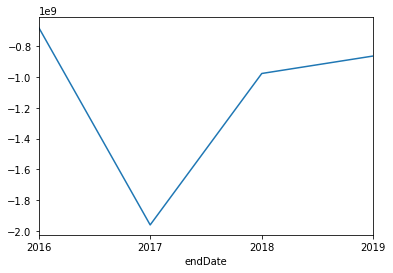

In [ ]:
income_is.loc['netIncome']
netincome=income_is.loc['netIncome']
print(netincome)

netincome.plot()

endDate
2019-12-31    24578000000
2018-12-31    21461000000
2017-12-31    11759000000
2016-12-31     7000132000
Name: totalRevenue, dtype: object


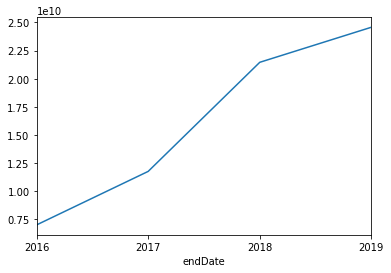

In [ ]:
income_is.loc['totalRevenue']
totalrevenue=income_is.loc['totalRevenue']
print(totalrevenue)
totalrevenue.plot()

In [ ]:
#net margin=net income/total R
#hiii, here

#Net Profit Margin = net income / total revenue
def Net_Margin():
  #put info into two lists
  list_NetIncome = []
  for ni in netincome:
    list_NetIncome.append(ni)

  list_totalR = []
  for tR in totalrevenue:
    list_totalR.append(tR)

  #compute using zip()
  NetMargin = [ income / revenue for income, revenue in zip(list_NetIncome, list_totalR)]
  print('\n')
  print("The net margin from 2019 to 2016 are ", NetMargin)

Net_Margin()



The net margin from 2019 to 2016 are  [-0.03507201562372854, -0.045477843530124414, -0.16685092269750829, -0.09641446761289645]


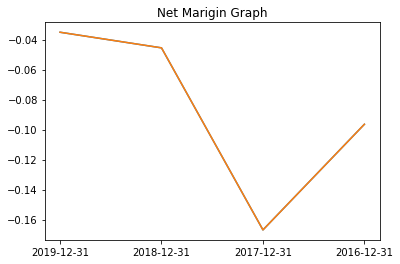

In [ ]:
#net margin graph
#larger net margin-> the company is in a better financial position 

def net_marigin_graph(): 
    
    list_NI=[]
    for ni in netincome:
        list_NI.append(ni)
    
    list_R=[]
    for r in totalrevenue:
        list_R.append(r)
    
    netmargin=[ income / revenue for income, revenue in zip(list_NI, list_R)]
    plt.plot(netmargin)

    x=['2019-12-31','2018-12-31','2017-12-31','2016-12-31']

    plt.plot(x,netmargin)
    plt.title('Net Marigin Graph')
net_marigin_graph()

In [ ]:
#get current Assets and current Liability from balance sheet 

sheet=si.get_balance_sheet('TSLA')
sheet

endDate,2019-12-31,2018-12-31,2017-12-31,2016-12-31
Breakdown,,,,
intangibleAssets,3.390000e+08,2.820000e+08,3.615020e+08,3.761450e+08
capitalSurplus,1.273700e+10,1.024900e+10,9.178024e+09,7.773727e+09
totalLiab,2.619900e+10,2.342700e+10,2.302305e+10,1.675895e+10
totalStockholderEquity,6.618000e+09,4.923000e+09,4.237242e+09,4.752911e+09
minorityInterest,1.492000e+09,1.390000e+09,1.395080e+09,1.152214e+09
otherCurrentLiab,3.636000e+09,2.955000e+09,3.098379e+09,1.960675e+09
totalAssets,3.430900e+10,2.974000e+10,2.865537e+10,2.266408e+10
otherCurrentAssets,2.460000e+08,1.930000e+08,1.553230e+08,1.055190e+08
retainedEarnings,-6.083000e+09,-5.318000e+09,-4.974299e+09,-2.997237e+09


In [ ]:
currentA=sheet.loc['totalCurrentAssets']
print(currentA)

currentL=sheet.loc['totalCurrentLiabilities']
print(currentL)

#current ratio= currentA/currentL --> still need to find out how to divide these two

endDate
2019-12-31    1.210300e+10
2018-12-31    8.307000e+09
2017-12-31    6.570520e+09
2016-12-31    6.259796e+09
Name: totalCurrentAssets, dtype: float64
endDate
2019-12-31    1.066700e+10
2018-12-31    9.993000e+09
2017-12-31    7.674740e+09
2016-12-31    5.835789e+09
Name: totalCurrentLiabilities, dtype: float64


In [ ]:
#Putting Current Assets and Current Liabilities into a list to compute for current ratio
listA = []
for a in currentA:
    listA.append(a)
    
print(listA)

listL= []
for l in currentL:
  listL.append(l)

print(listL)

[12103000000.0, 8307000000.0, 6570520000.0, 6259796000.0]
[10667000000.0, 9993000000.0, 7674740000.0, 5835789000.0]


In [ ]:
#Divide the lists
def CurrentRatio():
  currentRatio = [ca / cl for ca, cl in zip(listA, listL)] 
  print("The current ratio from 2019 to 2016 are ", currentRatio)
CurrentRatio()

The current ratio from 2019 to 2016 are  [1.1346207931002157, 0.8312818973281297, 0.8561228132809711, 1.0726563280475014]


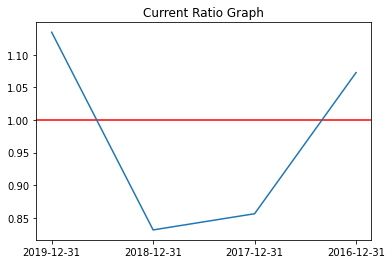

In [ ]:
#current ratio graph
#if current ratio>=1, means company is doing good (have enough cash to pay off short-term L)
#if current ratio<1-> not good for company 

def currentRatio_graph():
    
    currentRatio=[ca/cl for ca, cl in zip(listA, listL)]

    from matplotlib import pyplot as plt

    x=['2019-12-31','2018-12-31','2017-12-31','2016-12-31']
    plt.axhline(y=1,color='r')
    plt.plot(x,currentRatio)
    plt.title('Current Ratio Graph')
currentRatio_graph()

In [ ]:
#Putting Current Assets and Current Liabilities into a list to compute for current ratio
listA = []
for a in currentA:
    listA.append(a)
    
print(listA)

listL= []
for l in currentL:
  listL.append(l)

print(listL)

[12103000000.0, 8307000000.0, 6570520000.0, 6259796000.0]
[10667000000.0, 9993000000.0, 7674740000.0, 5835789000.0]


In [ ]:
#Putting Current Assets and Current Liabilities into a list to compute for current ratio
listA = []
for a in currentA:
    listA.append(a)
    
print(listA)

listL= []
for l in currentL:
  listL.append(l)

print(listL)

[12103000000.0, 8307000000.0, 6570520000.0, 6259796000.0]
[10667000000.0, 9993000000.0, 7674740000.0, 5835789000.0]


In [ ]:
#Putting Current Assets and Current Liabilities into a list to compute for current ratio
listA = []
for a in currentA:
    listA.append(a)
    
print(listA)

listL= []
for l in currentL:
  listL.append(l)

print(listL)

[12103000000.0, 8307000000.0, 6570520000.0, 6259796000.0]
[10667000000.0, 9993000000.0, 7674740000.0, 5835789000.0]


In [ ]:
#Debt-To-Equity Ratio = total assets / total liabilities
def DebtEquity():
  #Get info
  totalL=sheet.loc['totalLiab']
  print(totalL)

  total_SE=sheet.loc['totalStockholderEquity']
  print(total_SE)

  #Put info into lists to compute
  list_TL = []
  for tl in totalL:
    list_TL.append(tl)

  list_tSE = []
  for se in total_SE:
    list_tSE.append(se)
  
  #Compute
  DE_ratio = [total_liab / total_equity for total_liab, total_equity in zip(list_TL, list_tSE)]
  print('\n')
  print("The debt-to-equity ratio from 2019 to 2016 are ", DE_ratio)

DebtEquity()

endDate
2019-12-31    2.619900e+10
2018-12-31    2.342700e+10
2017-12-31    2.302305e+10
2016-12-31    1.675895e+10
Name: totalLiab, dtype: float64
endDate
2019-12-31    6.618000e+09
2018-12-31    4.923000e+09
2017-12-31    4.237242e+09
2016-12-31    4.752911e+09
Name: totalStockholderEquity, dtype: float64


The debt-to-equity ratio from 2019 to 2016 are  [3.958748866727108, 4.7586837294332724, 5.433498959936676, 3.5260393051752916]


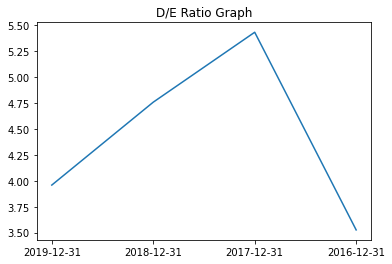

In [ ]:
#DE ratio graph
#a downward trend over time in the D/E ratio is a good indicator a company is on increasingly solid financial ground

def DEratio():
    
    totalL=sheet.loc['totalLiab']
    totalSE=sheet.loc['totalStockholderEquity']

    list_TL=[]
    for tl in totalL:
        list_TL.append(tl)
    
    list_SE=[]
    for se in totalSE:
        list_SE.append(se)
    
    DEratio=[total_liab/total_equity for total_liab, total_equity in zip (list_TL, list_SE)]

    x=['2019-12-31','2018-12-31','2017-12-31','2016-12-31']

    plt.plot(x,DEratio)
    plt.title('D/E Ratio Graph')
DEratio()

In [ ]:
#Return on Sales Ratio = ebit / net sales
def RoS():
  #Calculate Net Sales = total revenue - cost of revenue
  total_Revenue = income_is.loc['totalRevenue']
  print(total_Revenue)

  costOfRevenue = income_is.loc['costOfRevenue']
  print(costOfRevenue)

  list_totalRevenue = []
  for tR in total_Revenue:
    list_totalRevenue.append(tR)

  list_costR = []
  for cR in costOfRevenue:
    list_costR.append(cR)

  net_sales = [revenue - costs for revenue, costs in zip(list_totalRevenue, list_costR)]
  print('\n')
  print("The net sales are", net_sales)

  #Return on Sales calculation
  ebit = income_is.loc['ebit'] #ebit = earning before interest = operating profit
  print('\n')
  print(ebit)
  print('\n')

  list_ebit = []
  for earning in ebit:
    list_ebit.append(earning)

  Ros = [ OperatingProfit / NetSales for OperatingProfit, NetSales in zip(list_ebit, net_sales)]
  
  print("The return on sales ratio from 2019 to 2016 are", Ros)

RoS()

endDate
2019-12-31    24578000000
2018-12-31    21461000000
2017-12-31    11759000000
2016-12-31     7000132000
Name: totalRevenue, dtype: object
endDate
2019-12-31    20509000000
2018-12-31    17419000000
2017-12-31     9536000000
2016-12-31     5400875000
Name: costOfRevenue, dtype: object


The net sales are [4069000000, 4042000000, 2223000000, 1599257000]


endDate
2019-12-31       80000000
2018-12-31     -253000000
2017-12-31    -1632000000
2016-12-31     -645640000
Name: ebit, dtype: object


The return on sales ratio from 2019 to 2016 are [0.01966085033177685, -0.06259277585353785, -0.7341430499325237, -0.4037124739801045]


In [ ]:
#Free Cash Flow
cash_flow=si.get_cash_flow('TSLA')
cash_flow

endDate,2019-12-31,2018-12-31,2017-12-31,2016-12-31
Breakdown,,,,
changeToLiabilities,1.483000e+09,2.129000e+09,8.570000e+08,1.133602e+09
totalCashflowsFromInvestingActivities,-1.436000e+09,-2.337000e+09,-4.196000e+09,-1.081085e+09
netBorrowings,7.980000e+08,8.900000e+07,3.385000e+09,1.718190e+09
totalCashFromFinancingActivities,1.529000e+09,5.740000e+08,4.415000e+09,3.743976e+09
changeToOperatingActivities,-1.036000e+09,-5.510000e+08,-1.150000e+09,-9.780310e+08
issuanceOfStock,1.111000e+09,2.960000e+08,6.590000e+08,1.865551e+09
netIncome,-8.620000e+08,-9.760000e+08,-1.962000e+09,-6.749140e+08
changeInCash,2.506000e+09,3.120000e+08,1.980000e+08,2.532509e+09
effectOfExchangeRate,8.000000e+06,-2.300000e+07,4.000000e+07,-6.553000e+06


In [ ]:
#Free Cash Flow = cash flow from operation - Capital Expenditure
def Free_CashFlow():
  cash_operation = cash_flow.loc["totalCashFromOperatingActivities"]
  print(cash_operation)

  capital_expenditures = cash_flow.loc["capitalExpenditures"]
  print(capital_expenditures)

  list_OperCash = []
  for c in cash_operation:
    list_OperCash.append(c)

  list_CapExpen = []
  for e in capital_expenditures:
    list_CapExpen.append(e)

  Free_CF = [cash - expenditure for cash, expenditure in zip(list_OperCash, list_CapExpen)]
  print('\n')
  print("The free cash flow from 2019 to 2016 are", Free_CF)

Free_CashFlow()


endDate
2019-12-31    2.405000e+09
2018-12-31    2.098000e+09
2017-12-31   -6.100000e+07
2016-12-31   -1.238290e+08
Name: totalCashFromOperatingActivities, dtype: float64
endDate
2019-12-31   -1.432000e+09
2018-12-31   -2.319000e+09
2017-12-31   -4.081000e+09
2016-12-31   -1.440471e+09
Name: capitalExpenditures, dtype: float64


The free cash flow from 2019 to 2016 are [3837000000.0, 4417000000.0, 4020000000.0, 1316642000.0]


In [ ]:
#Ratios done:
# Current Ratio (w/graph)
# D/E Ratio (w/graph)
# Return on Sales Ratio
# Net Margin Ratio (w/graph)
# Free Cash Flow


Hi! Welcome to Prototype 5! Currently we are offering five ratios for you to check out about Tesla.
1. Current Ratio for liquidity
2. Debt-to-Equity Ratio for solvency
3. Return on Sales Ratio for profitability
4. Net Margin Ratio for profitability
5. Free Cash Flow
Please enter the number of service you want to see: 1
The current ratio from 2019 to 2016 are  [1.1346207931002157, 0.8312818973281297, 0.8561228132809711, 1.0726563280475014]
Do you want to check out the next service? 3
Please enter the number of service you want to see: 
Please enter yes or no. 
Please enter an integer from 1 to 5.
Do you want to check out the next service? no


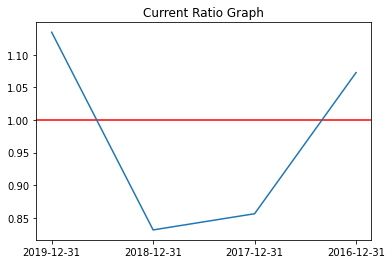

In [ ]:
print("Hi! Welcome to Prototype 5! Currently we are offering five ratios for you to check out about Tesla.")
print("1. Current Ratio for liquidity")
print("2. Debt-to-Equity Ratio for solvency")
print("3. Return on Sales Ratio for profitability")
print("4. Net Margin Ratio for profitability")
print("5. Free Cash Flow")

def start():
    user_input = input("Please enter the number of service you want to see: " )

    if user_input == '1':
        CurrentRatio()
        currentRatio_graph()
    elif user_input == '2':
        DebtEquity()
        DEratio()
    elif user_input == '3':
        RoS()
    elif user_input == '4':
        Net_Margin()
        net_marigin_graph()
    elif user_input == '5':
        Free_CashFlow()
    else:
        print("Please enter an integer from 1 to 5.")
    
def whether_quit():
  global continue_or_not
  continue_or_not = input("Do you want to check out the next service? ").upper()
    

stay = True
while stay == True:
  start()
  whether_quit()

  if continue_or_not == "YES":
    stay = True
  elif continue_or_not == "NO":
    stay = False
  else:
    print("Please enter yes or no. ")